# How Trackeddy Works 

Trackeddy is an algorithm which identifies and tracks eddies assuming that their outer most contours is well fitted by an ellipse (A. Fernandes and S. Nascimento, (2006)). Additionally, the area of the eddy contour should be smaller than  the first baroclinic Rossby Radius of Deformation (**Mesoscale Scaling**) defined as:
\begin{equation}
 2\pi L_r
\end{equation}
(Klocker, A., & Abernathey, R. (2014)).

To avoid the detection of meanders (jets), and due to the coherience of eddies, the **eccentricity** of the fitted ellipse eddies should be smaller than 
\begin{equation}
\frac{b}{2a}
\end{equation}
which qualitatively corresponds to a semi-major axis two times larger than the semi-minor axis.

Optionally, an additional criterion is whe the 2D Gaussian fitting is implemented, this criterion identifies eddies only if the fitted 2D Gaussian has a fitness over 90%.

To install trackeddy please follow the instructions at [Trackeddy ReadTheDocs](https://trackeddy.readthedocs.io/en/latest/getting_started.html).

Please be aware that this package still under development, therfore any issue can be reported at the [Github Page](https://github.com/Josue-Martinez-Moreno/trackeddy). or please send an email to [josue.martinezmoreno@anu.edu.au](mailto:josue.martinezmoreno@anu.edu.au).

This code will be transfer to classes as soon as an stable version is released.

In [51]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *

from trackeddy.physics import *

import matplotlib.pyplot as plt

#Allow interactive plots
%matplotlib inline

In [52]:
# Load Data
filepath = '../input/dt_global_allsat_phy_l4_20160901.nc'

In [53]:
# Open netcdf Dataset.
ncfile     = Dataset(filepath)
# Load data into memory
sla        = ncfile.variables['sla'][:]
lon        = ncfile.variables['longitude'][:]
lat        = ncfile.variables['latitude'][:]

In [54]:
# Define area of study
areamap = array([[0,len(lon)],[0,len(lat)]]) # Global option

The next code section contain the parameters used by track eddy to define and identify eddies. To know more about it, please refer to the [Trackeddy Documentation](https://trackeddy.readthedocs.io/en/latest/pages/Methods.html). The following parameters correspond to the default values, except for the spatial filter.

In [55]:
# Time and spatial filter
filters = {'time':{'type':None,'t':None,'t0':None,'value':None},
           'spatial':{'type':'moving','window':50,'mode':'uniform'}}

# Mesoscale scaling 
checkarea={'mesoscale':2*np.pi}

# Eddy definition criteria
preferences={'ellipse':0.85,'eccentricity':0.85,'gaussian':0.8}

In [56]:
# Levels to be analysed and to extract positive eddies from anomaly
levels = {'max':0.01,'min':0.01,'step':0.01}

Make sure the dimention of the input matrix is 3D, which where the first index corresponds to time and the other two correspond to spatial dimentions. For example:

```
shape(sla)
>>> (1, 720, 1440)
```

where 1 corresponds to the time step of the 1st of September 2016, and 720 grid cells in latitude and 1440 grid cells in longitude.


In [57]:
positive_eddies=analyseddyzt(sla,lon,lat,0,1,1,levels,preferences=preferences
             ,areamap=areamap,areaparms=checkarea,filters=filters
             ,maskopt='contour',diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
 0% [==========>]100% | Elapsed Time: 14 s | Estimated Time: 14 s | Info: # of E 826 |


The output of analyseddyzt is a dictionary which contain all the parameters that define an eddy.

To convert it back to a field, its necesary to use the following function:

In [48]:
positive_eddy_field=reconstruct_syntetic(shape(sla),lon,lat,positive_eddies)

 0% [>          ]2% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_0 |

 0% [==========>]100% | Elapsed Time: 1 s | Estimated Time: 1 s | Info: eddyn_41 |


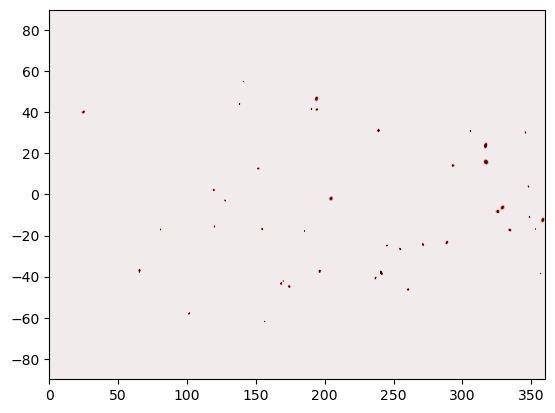

In [50]:
plt.pcolormesh(lon,lat,positive_eddy_field[0,:,:],vmin=-0.01,vmax=0.01,cmap=cm.cm.balance)#,xan=1,yan=1,figsize=(5,2.5),fontsize=12)
# colorbar()

In [10]:
# Levels to be analysed and to extract negative eddies from anomaly
levels = {'max':sla[0,:,:].min(),'min':-0.01,'step':-0.03}

In [11]:
negative_eddies=analyseddyzt(sla,lon,lat,0,1,1,levels,preferences=preferences
             ,areamap=areamap,areaparms=checkarea,filters=filters
             ,maskopt='contour',diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
 0% [==========>]100% | Elapsed Time: 74 s | Estimated Time: 74 s | Info: # of E 6882 |


In [12]:
negative_eddy_field=reconstruct_syntetic(shape(sla),lon,lat,negative_eddies)

 0% [==========>]100% | Elapsed Time: 14 s | Estimated Time: 14 s | Info: eddyn_699 |


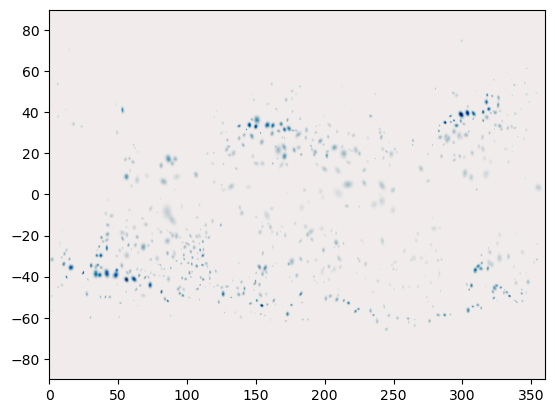

In [13]:
plt.pcolormesh(lon,lat,negative_eddy_field[0,:,:],vmin=-0.80,vmax=0.80,cmap=cm.cm.balance)#,xan=1,yan=1,figsize=(5,2.5),fontsize=12)
# colorbar()

In [2]:
filepath = '/Users/jmtzmo/Downloads/sla_snapshot_KEx.nc'

In [3]:
# Open netcdf Dataset.
ncfile     = Dataset(filepath)
# Load data into memory
sla        = ncfile.variables['sla'][:]
lon        = ncfile.variables['lon'][:]
lat        = ncfile.variables['lat'][:]

In [28]:
filters = {'time':{'type':None,'t':None,'t0':None,'value':None},
           'spatial':{'type':'moving','window':50,'mode':'uniform'}}

checkarea={'constant': np. inf} #Mesoscale scaling: 'mesoscale':2жпр.pi,

areamap = np.asarray([ [0, len(lon)], [0, len(lat)]]) # Global option

preferences={'ellipse':0.8, 'eccentricity': 0.9, 'gaussian':0.8}

sla = np.ma.masked_where(np.isnan (sla)==1,sla)

sla1 = reshape (sla, [1, lat.size, lon.size])

In [29]:
sla_ = np.expand_dims(sla,0)

In [30]:
sla_.shape

(1, 150, 500)

In [36]:
levels1 = {'max' :np.max(sla), 'min':0, 'step':0.001}

positive_eddies=analyseddyzt (sla_, lon, lat, 0, 1, 1, levels1, preferences=preferences, areamap=areamap,
areaparms=checkarea,filters=filters,maskopt='gaussian',diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
 0% [==========>]100% | Elapsed Time: 62 s | Estimated Time: 62 s | Info: # of E 3840 |


In [37]:
positive_eddy_field=reconstruct_syntetic(shape(sla_),lon,lat,positive_eddies)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_29 |


In [38]:
levels2 = {'max':np.min(sla), 'min':0, 'step':-0.001}
# levels2 = {'max' :np.max(sla), 'min':0, 'step':0.001}

negative_eddies=analyseddyzt (sla_, lon, lat, 0, 1, 1, levels2, preferences=preferences, areamap=areamap,
areaparms=checkarea, filters=filters, maskopt='gaussian', diagnostics=False,pprint=True)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: Init time |
 0% [==========>]100% | Elapsed Time: 74 s | Estimated Time: 74 s | Info: # of E 4333 |


In [39]:
negative_eddy_field=reconstruct_syntetic(shape(sla_),lon,lat,negative_eddies)

 0% [==========>]100% | Elapsed Time: 0 s | Estimated Time: 0 s | Info: eddyn_24 |


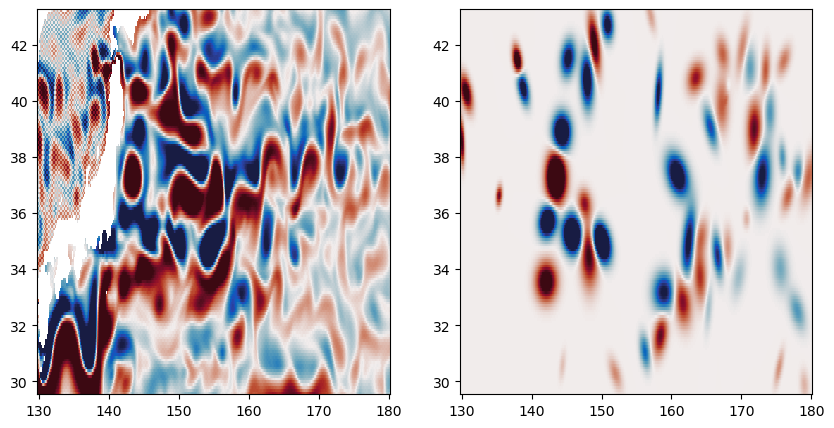

In [40]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(lon,lat,sla,vmin=-0.09,vmax=0.09,cmap=cm.cm.balance)

ax[1].pcolormesh(lon,lat,positive_eddy_field[0,:,:]+negative_eddy_field[0,:,:],vmin=-0.09,vmax=0.09,cmap=cm.cm.balance)

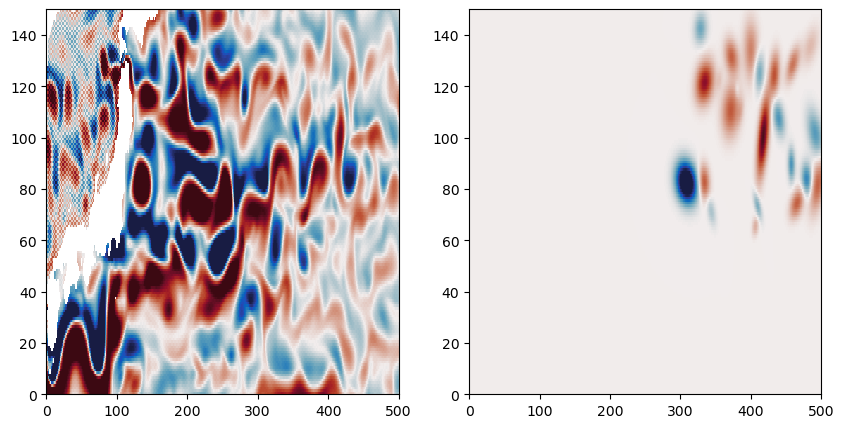

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].pcolormesh(sla,vmin=-0.09,vmax=0.09,cmap=cm.cm.balance)

ax[1].pcolormesh(positive_eddy_field[0,:,:]+negative_eddy_field[0,:,:],vmin=-0.09,vmax=0.09,cmap=cm.cm.balance)

## Reconstructed field

In [ ]:
basemap_mplot(lon,lat,[sla[0,:,:],+negative_eddy_field[0,:,:]+positive_eddy_field[0,:,:]],
              title=["SLA","Reconstructed SSHa"],projection='mbtfpq',
              lat_0=-90,lon_0=-180,resolution='c',vmin=-0.80,vmax=0.80,
              cmap=cm.cm.balance,xan=2,yan=1,figsize=(6,2.5),fontsize=12)

### Difference between fields

In [ ]:
basemap_mplot(lon,lat,sla[0,:,:]-(negative_eddy_field[0,:,:]+positive_eddy_field[0,:,:]),
              title="SLA - Reconstructed SSHa",projection='mbtfpq',
              lat_0=-90,lon_0=-180,resolution='c',vmin=-0.80,vmax=0.80,
              cmap=cm.cm.balance,xan=1,yan=1,figsize=(6,2.5),fontsize=12)
colorbar()